In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
np.random.seed(5)

In [5]:
data["target"] = data["unfinished"]
data = data.drop(["unfinished"], axis=1)
data.target = data.target.map({0: 1, 1: 0})
columns = [col for col in data.columns if col != "target"]
x = data[columns]
y = data["target"]

print(x)

      expected_hours  price
0                 26    192
1                 88   9015
2                 89   2577
3                 42    275
4                 39    170
...              ...    ...
2152              80   7518
2153              52   1332
2154              40    473
2155              75   5324
2156              37    377

[2157 rows x 2 columns]


In [6]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.25, stratify=y)

In [7]:
scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

print(train_x[10])
print(test_x[10])

[-0.40039294 -0.59209496]
[ 0.40732098 -0.47969904]


In [8]:
model = SVC()
model.fit(train_x, train_y)
predict = model.predict(test_x)

acc = accuracy_score(test_y, predict)
print("Model accuracy: %.2f" % (acc*100))

Model accuracy: 66.85


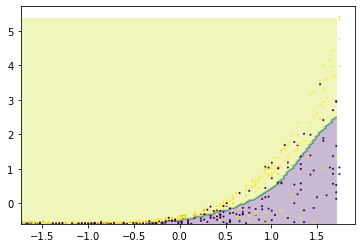

In [9]:
hours = test_x[:,0]
price = test_x[:,1]

x_min = hours.min()
x_max = hours.max()
y_min = price.min()
y_max = price.max()

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
xx.ravel()

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

pred_points = model.predict(points)
pred_points = pred_points.reshape(xx.shape)

plt.contourf(xx, yy, pred_points, alpha=.3)
plt.scatter(hours, price, c=test_y, s=1)